 # Task -- Regression
 First, let’s see how ratings can be predicted as a function of (a) whether a review is a ‘verified purchase’, and (b) the length of the review (in characters).

 ## Problem 1
 What is the distribution of ratings in the dataset? That is, how many 1-star, 2-star, 3-star (etc.) reviews are there? You may write out the values or include a simple plot (1 mark).

In [5]:
# ignore the warnings from Pandas
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# read data and drop NA
data = pd.read_csv('./amazon_reviews_us_Gift_Card_v1_00.tsv', delimiter='\t')
print("# of Rows before drop NA value: ")
print(len(data))
data = data.dropna()
print("# of Rows after drop NA value: ")
print(len(data))

# of Rows before drop NA value: 
148310
# of Rows after drop NA value: 
148304


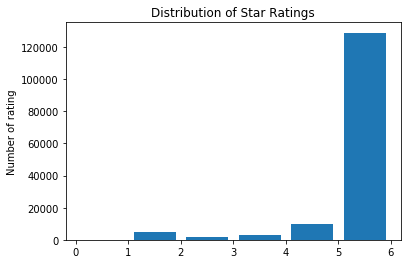

In [6]:
plt.hist(data['star_rating'], bins=[0,1,2,3,4,5,6], rwidth=0.8)
plt.xticks(range(0, 7))
plt.ylabel('Number of rating')
plt.title("Distribution of Star Ratings")
plt.show()

In [7]:
for i in range(1, 6):
    print("The percent of %1d-star: %.1f%%" % (i, (len(data[data['star_rating']==i])/len(data)*100)))

The percent of 1-star: 3.2%
The percent of 2-star: 1.1%
The percent of 3-star: 2.1%
The percent of 4-star: 6.6%
The percent of 5-star: 87.0%


 We can see from the above plot and printout that most of ratings are 5-star (87%) while the least rating is 2-star (only 1%), which means this dataset is extremely unbalanced.

 The dataset only has 6 rows containing NA value and we decide to remove them from the data.

 ## Problem 3
 Train a simple predictor to predict the star rating using two features:

 star_rating ≃ θ0 + θ1 × [review is verified] + θ2 × [review length].

 Report the values of θ0, θ1, and θ2. Briefly describe your interpretation of these values, i.e., what do θ0, θ1, and θ2 represent? Explain these in terms of the features and labels, e.g. if the coefficient of ‘review length’ is negative, what would that say about verified versus unverified reviews (1 mark)?

In [8]:
# Data preprocessing
data['verified_purchase_int'] = data.apply(lambda x: int(x['verified_purchase'] == "Y"), axis = 1)
data['review_body_length'] = data.apply(lambda x: len(x['review_body']), axis = 1)
data['theta_zero'] = 1

In [9]:
# Define My Own Regression
def myRegression(featureNames, labelName, data):
    X, y = data[featureNames], data[labelName]
    theta, residuals, rank, s = np.linalg.lstsq(X, y)
    MSE = ((y - np.dot(X, theta))**2).mean()
    for i in range(len(theta)):
        print("Theta%1d: %.5f" % (i, theta[i]))
    print("MSE: %.3f" % MSE)

featureNames = ['theta_zero', 'verified_purchase_int', 'review_body_length']
labelName = 'star_rating'
myRegression(featureNames, labelName, data)

Theta0: 4.84502
Theta1: 0.04987
Theta2: -0.00125
MSE: 0.651


 We first convert "verified_purchase" from "Y" and "N" to "1" and "0" and calculate the length of "review body" in character as features.

 After define our own regression, we got three theta values $\theta_0, \theta_1, \theta_2$ and MSE.

 $\theta_0$ is a bias term, which means if there is no "verified_purchase" and "review_body" features, the predicted value of rating should be $\theta_0$.

 $\theta_1$ means the relationship between "verified_purchase" and "star_rating". If the purchase is verified, then the rating will increase by  $\theta_1$.

 $\theta_2$ means the relationship between the length of "review_body" in character and "star_rating". If the length increase by 1, then the rating will increase by  $\theta_2$.

 In this case, an interesting fact is that $\theta_2$ is a negative number, which means the more characters you write in your review, the lower rating you will rate this product. This fact is fun but reasonable since people will tend to write some bad reviews to complain when they are unsatisfied than to write some fancy words to praise when they are satisfied.

 ## Problem 4
 Train another predictor that only uses one feature:

 star rating ≃ θ0 + θ1 × [review is verified]

 Report the values of θ0 and θ1. Note that coefficient you found here might be quite different (i.e., much larger or smaller) than the one from Question 3, even though these coefficients refer to the same feature. Provide an explanation as to why these coefficients might vary so significantly (1 mark).1

In [10]:
featureNames = ['theta_zero', 'verified_purchase_int']
labelName = 'star_rating'
myRegression(featureNames, labelName, data)

Theta0: 4.57811
Theta1: 0.16796
MSE: 0.685


 After removing the length of "review_body" features, compared with problem 3, the value of $\theta_0$ decreases from 4.845 to 4.578,  and $\theta_1$ increases from 0.0499 to 0.1679.

 For $\theta_0$, this time it can be interpreted as the predicted value of rating score when the "verified_purchase" feature is 0. Compared with problem 3, as we know, if the length of "review_body" increases, the rating should decrease. So $\theta_0$ in problem 3 should be bigger than the one in problem 4 since the length of "review_body" is always bigger than or equal to 0 (so that it can offset the decrease aroused by review body).

 For $\theta_1$, it still means the relationship between "verified_purchase" and "star_rating". If the purchase is verified, then the rating will increase by  $\theta_1$. But, as we noticed, if "verified_purchase" is 1, the predicted rating is $\theta_0+\theta_1$, and since $\theta_0$ decreases a lot, to compensate for this, $\theta_1$ should increase accordingly.

 ## Problem 5
 Split the data into two fractions – the first 90% for training, and the remaining 10% testing (based on the order they appear in the file). Train the same model as above on the training set only. What is the model’s MSE on the training and on the test set (1 mark)?

In [11]:
def myRegression(featureNames, labelName, dataTrain, dataTest):
    X, y = dataTrain[featureNames], dataTrain[labelName]
    theta, residuals, rank, s = np.linalg.lstsq(X, y)
    print("================ Training ================")
    MSE = ((y - np.dot(X, theta))**2).mean()
    for i in range(len(theta)):
        print("Theta%1d: %.5f" % (i, theta[i]))
    print("MSE: %.3f" % MSE)
    print("================ Testing ================")
    X, y = dataTest[featureNames], dataTest[labelName]
    MSE = ((y - np.dot(X, theta))**2).mean()
    print("MSE: %.3f" % MSE)

def trainByRatio(ratio, data, featureNames, labelName):
    train = data[:int(len(data)*ratio)]
    test = data[int(len(data)*ratio):]
    print("================ For ratio ", ratio, "================")
    myRegression(featureNames, labelName, train, test)

In [12]:
trainByRatio(0.9, data, featureNames, labelName)

================ For ratio  0.9 ================
================ Training ================
Theta0: 4.43958
Theta1: 0.31645
MSE: 0.656
================ Testing ================
MSE: 0.972


 ## Problem 6
 Repeat the above experiment, varying the size of the training and test fractions between
 5% and 95% for training (using the complement for testing). Show how the training and test error vary
 as a function of the training set size (again using a simple plot or table). Does the size of the training
 set make a significant difference in testing performance? Comment on why it might or might not make
 a significant difference in this instance (2 marks).

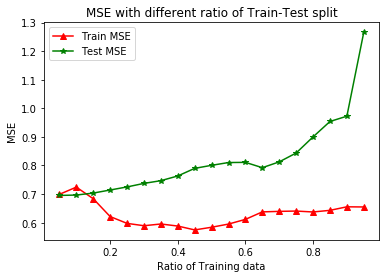

In [13]:
# To plot a graph, let's revise the function slightly so that we can store the MSE in a list
def myRegression(featureNames, labelName, dataTrain, dataTest, trainMSE, testMSE):
    # Training
    X, y = dataTrain[featureNames], dataTrain[labelName]
    theta, residuals, rank, s = np.linalg.lstsq(X, y)
    MSE = ((y - np.dot(X, theta))**2).mean()
    trainMSE.append(MSE)
    # Testing
    X, y = dataTest[featureNames], dataTest[labelName]
    MSE = ((y - np.dot(X, theta))**2).mean()
    testMSE.append(MSE)

def trainByRatio(ratio, data, featureNames, labelName, trainMSE, testMSE):
    train = data[:int(len(data)*ratio)]
    test = data[int(len(data)*ratio):]
    myRegression(featureNames, labelName, train, test, trainMSE, testMSE)

trainMSE, testMSE = [], []
# ratio from 5% to 95%, step by 5%
ratios = [i/100 for i in list(range(5, 100, 5))]

for ratio in ratios:
    trainByRatio(ratio, data, featureNames, labelName, trainMSE, testMSE)

# plot a graph
plt.plot(ratios, trainMSE, 'r^-', label='Train MSE')
plt.plot(ratios, testMSE, 'g*-', label='Test MSE')
plt.title('MSE with different ratio of Train-Test split')
plt.xlabel('Ratio of Training data')
plt.ylabel('MSE')
plt.legend()
plt.show()

 Yes. As we can see from the plot, the size of the training set makes a significant difference in testing performance. As we increase the training size, however, the test performance decreases. This isn't normal and may be due to the extremely unbalanced nature of this dataset. The star rating label may vary a lot between the training set and testing set as the ratio increases.

 The following plot proves our thought.

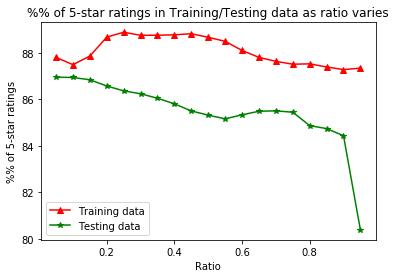

In [14]:
def calculatePortionOfFiveStars(ratio, data, trainPortion, testPortion):
    train = data[:int(len(data)*ratio)]
    test = data[int(len(data)*ratio):]
    trainPortion.append(len(train[train['star_rating']==i])/len(train)*100)
    testPortion.append(len(test[test['star_rating']==i])/len(test)*100)

trainPortion, testPortion = [], []
# ratio from 5% to 95%, step by 5%
ratios = [i/100 for i in list(range(5, 100, 5))]

for ratio in ratios:
    calculatePortionOfFiveStars(ratio, data, trainPortion, testPortion)

# plot a graph
plt.plot(ratios, trainPortion, 'r^-', label='Training data')
plt.plot(ratios, testPortion, 'g*-', label='Testing data')
plt.title('%% of 5-star ratings in Training/Testing data as ratio varies')
plt.xlabel('Ratio')
plt.ylabel('%% of 5-star ratings')
plt.legend()
plt.show()

 # Task -- Classification
 In this question we’ll alter the prediction from our regression task, so that we are now classifying whether a review is verified. Continue using the 90%/10% training and test sets you constructed previously, i.e., train on the training set and report the error/accuracy on the testing set.

 ## Problem 8
 First, let’s train a predictor that estimates whether a review is verified using the rating and the length:

 p(review is verified) ≃ σ(θ0 + θ1 × [star rating] + θ2 × [review length])

 Train a logistic regressor to make the above prediction (you may use a logistic regression library with default parameters, e.g. linear model.LogisticRegression() from sklearn). Report the classification accuracy of this predictor. Report also the proportion of labels that are positive (i.e., the proportion of reviews that are verified) and the proportion of predictions that are positive (1 mark).

In [15]:
# Define My Own Classification
from sklearn.linear_model import LogisticRegression

def myClassification(featureNames, labelName, dataTrain, dataTest):
    X, y = dataTrain[featureNames], dataTrain[labelName]
    clf = LogisticRegression().fit(X, y)
    y_ = clf.predict(X)
    print("================ Training ================")
    print("Accuracy: ", clf.score(X, y))
    print("Proportion of reviews that are verified: %.2f%%" % (len(dataTrain[dataTrain[featureNames]==1])/len(dataTrain)*100))
    print("Proportion of predictions that are positive: %.2f%%" % (np.mean(y_==1)*100))
    print("================ Testing ================")
    X, y = dataTest[featureNames], dataTest[labelName]
    y_ = clf.predict(X)
    print("Accuracy: ", clf.score(X, y))
    print("Proportion of reviews that are verified: %.2f%%" % (len(dataTest[dataTest[featureNames]==1])/len(dataTest)*100))
    print("Proportion of predictions that are positive: %.2f%%" % (np.mean(y_==1)*100))

def trainByRatio(ratio, data, featureNames, labelName):
    train = data[:int(len(data)*ratio)]
    test = data[int(len(data)*ratio):]
    print("================ For ratio ", ratio, "================")
    myClassification(featureNames, labelName, train, test)

featureNames = ['theta_zero', 'star_rating', 'review_body_length']
labelName = 'verified_purchase_int'
ratio = 0.9
trainByRatio(ratio, data, featureNames, labelName)

================ For ratio  0.9 ================
================ Training ================
Accuracy:  0.9511736456062275
Proportion of reviews that are verified: 100.00%
Proportion of predictions that are positive: 99.96%
================ Testing ================
Accuracy:  0.5597734475085968
Proportion of reviews that are verified: 100.00%
Proportion of predictions that are positive: 99.90%


 ## Problem 9
 Considering same prediction problem as above, can you come up with a more accurate predictor (e.g. using features from the text, timestamp, etc.)? Write down the feature vector you design, and report its train/test accuracy (1 mark).

In [16]:
# Let's do some analysis for other features first
print(data['marketplace'].unique())
print(data['product_category'].unique())
print(data['vine'].unique())

['US']
['Gift Card']
['N']


 As we can see from above, there are no big differences between these features.

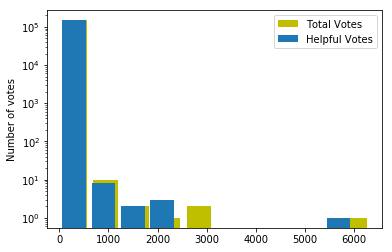

In [17]:
plt.hist(data['total_votes'], log=True, color='y',rwidth=0.8, label='Total Votes')
plt.hist(data['helpful_votes'], log=True, rwidth=0.8, label='Helpful Votes')
plt.ylabel('Number of votes')
plt.legend()
plt.show()

In [21]:
featureNames = ['theta_zero', 'star_rating', 'review_body_length', 'total_votes', 'helpful_votes']
labelName = 'verified_purchase_int'
ratio = 0.9
trainByRatio(ratio, data, featureNames, labelName)

================ For ratio  0.9 ================
================ Training ================
Accuracy:  0.9512111063660815
Proportion of reviews that are verified: 100.00%
Proportion of predictions that are positive: 99.96%
================ Testing ================
Accuracy:  0.5601105791922325
Proportion of reviews that are verified: 100.00%
Proportion of predictions that are positive: 99.80%


By adding 'total_votes' and 'helpful_votes' as features, the accuracy increased a little bit. But that's not enough.

 In problem 7 and problem 8, we both noticed that the distribution of our dataset is extremely unbalanced.

 One realistic solution is to shuffle the dataset so that the distribution can be more balanced! And the results suddenly become promising. Congrats!

In [22]:
data = data.sample(frac=1)
featureNames = ['theta_zero', 'star_rating', 'review_body_length', 'total_votes', 'helpful_votes']
labelName = 'verified_purchase_int'
ratio = 0.9
trainByRatio(ratio, data, featureNames, labelName)

================ For ratio  0.9 ================
================ Training ================
Accuracy:  0.9102664958456017
Proportion of reviews that are verified: 100.00%
Proportion of predictions that are positive: 99.62%
================ Testing ================
Accuracy:  0.9135594363158249
Proportion of reviews that are verified: 100.00%
Proportion of predictions that are positive: 99.58%
